In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import os

In [2]:
os.getcwd()

'/Users/aakashsingla'

In [3]:
#Merging of data

df1 = pd.read_excel(r'/Users/aakashsingla/Downloads/Data for technical assessment.xlsx', 0, index_col=0) 
df2 = pd.read_excel(r'/Users/aakashsingla/Downloads/Data for technical assessment.xlsx', 1, index_col=0) 
df = pd.concat([df1, df2], axis=1, ignore_index=False)
df.head()

,NWP (£m),NWP (£m) .1,NWP (£m) .2,NWP (£m) .3,NWP (£m) .4,SCR (£m),SCR (£m).1,SCR (£m).2,SCR (£m).3,SCR (£m).4,...,Gross expense ratio,Gross expense ratio.1,Gross expense ratio.2,Gross expense ratio.3,Gross expense ratio.4,Gross combined ratio,Gross combined ratio.1,Gross combined ratio.2,Gross combined ratio.3,Gross combined ratio.4
NaN,2016YE,2017YE,2018YE,2019YE,2020YE,2016YE,2017YE,2018YE,2019YE,2020YE,...,2016YE,2017YE,2018YE,2019YE,2020YE,2016YE,2017YE,2018YE,2019YE,2020YE
Firm 1,-13779.8,0,0,0,0,1085.36,9.63584e-09,0,0,0,...,0,56.8137,0,0,0,0,68.2152,0,0,0
Firm 2,28.1781,26.865,25.0644,23.2264,21.7186,10.1903,10.1136,9.49523,8.14647,7.32458,...,0.743265,0.963451,0.814588,0,0,0.945394,1.12674,0.939197,0,0
Firm 3,0,75.6097,70.5787,78.4328,85.7358,322.955,363.782,362.291,394.296,400.7,...,0,0,0,0,0,0,0,0,0,0
Firm 4,22344.2,23963.9,25760.4,25512.7,24996,16573.6,16332.7,17103.6,17219.2,19600.3,...,0.14393,0.147519,0.0929706,0.054781,-0.546237,0.848032,1.47478,1.72797,1.20882,-10.7361


In [4]:
#renaming of columns
colNames = df.columns
colNames = [x.split(' (£m)',1)[0] if '(£m)' in x else x for x in colNames]
colNames = [x.split('.',1)[0] if 'ratio' in x else x for x in colNames]
df.columns = colNames
df.head()

,NWP,NWP,NWP,NWP,NWP,SCR,SCR,SCR,SCR,SCR,...,Gross expense ratio,Gross expense ratio,Gross expense ratio,Gross expense ratio,Gross expense ratio,Gross combined ratio,Gross combined ratio,Gross combined ratio,Gross combined ratio,Gross combined ratio
NaN,2016YE,2017YE,2018YE,2019YE,2020YE,2016YE,2017YE,2018YE,2019YE,2020YE,...,2016YE,2017YE,2018YE,2019YE,2020YE,2016YE,2017YE,2018YE,2019YE,2020YE
Firm 1,-13779.8,0,0,0,0,1085.36,9.63584e-09,0,0,0,...,0,56.8137,0,0,0,0,68.2152,0,0,0
Firm 2,28.1781,26.865,25.0644,23.2264,21.7186,10.1903,10.1136,9.49523,8.14647,7.32458,...,0.743265,0.963451,0.814588,0,0,0.945394,1.12674,0.939197,0,0
Firm 3,0,75.6097,70.5787,78.4328,85.7358,322.955,363.782,362.291,394.296,400.7,...,0,0,0,0,0,0,0,0,0,0
Firm 4,22344.2,23963.9,25760.4,25512.7,24996,16573.6,16332.7,17103.6,17219.2,19600.3,...,0.14393,0.147519,0.0929706,0.054781,-0.546237,0.848032,1.47478,1.72797,1.20882,-10.7361


In [5]:
#Multiindexing of Dataframes
df.columns = pd.MultiIndex.from_arrays([df.columns, df.iloc[0]])
df = df[1:]
df.head()



NWP                                          SCR               \
nan      2016YE   2017YE   2018YE   2019YE   2020YE   2016YE       2017YE   
Firm 1 -13779.8        0        0        0        0  1085.36  9.63584e-09   
Firm 2  28.1781   26.865  25.0644  23.2264  21.7186  10.1903      10.1136   
Firm 3        0  75.6097  70.5787  78.4328  85.7358  322.955      363.782   
Firm 4  22344.2  23963.9  25760.4  25512.7    24996  16573.6      16332.7   
Firm 5   68.201  51.6631  44.0108  42.0086  81.2737  52.8244      38.0538   

                                   ... Gross expense ratio            \
nan      2018YE   2019YE   2020YE  ...              2016YE    2017YE   
Firm 1        0        0        0  ...                   0   56.8137   
Firm 2  9.49523  8.14647  7.32458  ...            0.743265  0.963451   
Firm 3  362.291  394.296    400.7  ...                   0         0   
Firm 4  17103.6  17219.2  19600.3  ...             0.14393  0.147519   
Firm 5  34.6968  57.2318  66.2308  ...            0.177212   0.13431   

                                      Gross combined ratio                     \
nan        2018YE    2019YE    2020YE               2016YE   2017YE    2018YE   
Firm 1          0         0         0                    0  68.2152         0   
Firm 2   0.814588         0         0             0.945394  1.12674  0.939197   
Firm 3          0         0         0                    0        0         0   
Firm 4  0.0929706  0.054781 -0.546237             0.848032  1.47478   1.72797   
Firm 5   0.109074  0.121044  0.109187             0.508711  1.25945   1.30417   

                            
nan       2019YE    2020YE  
Firm 1         0         0  
Firm 2         0         0  
Firm 3         0         0  
Firm 4   1.20882  -10.7361  
Firm 5  0.983277  0.997184  

[5 rows x 85 columns]

In [6]:
df['NWP'].transpose()



,Firm 1,Firm 2,Firm 3,Firm 4,Firm 5,Firm 6,Firm 7,Firm 8,Firm 9,Firm 10,...,Firm 316,Firm 317,Firm 318,Firm 319,Firm 320,Firm 321,Firm 322,Firm 323,Firm 324,Firm 325
nan,,,,,,,,,,,,,,,,,,,,,
2016YE,-13779.8,28.1781,0,22344.2,68.201,1826.8,5855.17,0,17.2423,1273.95,...,0,1291.37,422.646,0.000963584,0,0,2092.16,0,23.4154,241
2017YE,0,26.865,75.6097,23963.9,51.6631,3040.63,11688.6,0,15.7459,10516.2,...,-0.147332,2245.52,327.039,0,0,0,2084.12,0,22.6503,252.699
2018YE,0,25.0644,70.5787,25760.4,44.0108,1634.22,9414.98,0,19.1087,10087.6,...,-193.083,2520.01,371.149,0.000963584,0,-1.01137,2022.21,0,24.2685,332.522
2019YE,0,23.2264,78.4328,25512.7,42.0086,3082.59,10975.2,0,15.4809,8921.88,...,0.0144538,2275.22,441.155,0,0,-6.59907,2103.05,0,25.812,294.886
2020YE,0,21.7186,85.7358,24996,81.2737,3041.88,8359.91,0,9.51397,7893.06,...,-0.0376752,2150.07,0,0,0,24.6322,2029.7,0,26.5466,0


In [7]:
df

NWP                                          SCR               \
nan        2016YE   2017YE   2018YE   2019YE   2020YE   2016YE       2017YE   
Firm 1   -13779.8        0        0        0        0  1085.36  9.63584e-09   
Firm 2    28.1781   26.865  25.0644  23.2264  21.7186  10.1903      10.1136   
Firm 3          0  75.6097  70.5787  78.4328  85.7358  322.955      363.782   
Firm 4    22344.2  23963.9  25760.4  25512.7    24996  16573.6      16332.7   
Firm 5     68.201  51.6631  44.0108  42.0086  81.2737  52.8244      38.0538   
...           ...      ...      ...      ...      ...      ...          ...   
Firm 321        0        0 -1.01137 -6.59907  24.6322        0     0.258621   
Firm 322  2092.16  2084.12  2022.21  2103.05   2029.7  1711.22      1641.31   
Firm 323        0        0        0        0        0  30.4386      15.2326   
Firm 324  23.4154  22.6503  24.2685   25.812  26.5466  32.0966      30.2059   
Firm 325      241  252.699  332.522  294.886        0  209.182      223.801   

                                     ... Gross expense ratio            \
nan        2018YE   2019YE   2020YE  ...              2016YE    2017YE   
Firm 1          0        0        0  ...                   0   56.8137   
Firm 2    9.49523  8.14647  7.32458  ...            0.743265  0.963451   
Firm 3    362.291  394.296    400.7  ...                   0         0   
Firm 4    17103.6  17219.2  19600.3  ...             0.14393  0.147519   
Firm 5    34.6968  57.2318  66.2308  ...            0.177212   0.13431   
...           ...      ...      ...  ...                 ...       ...   
Firm 321  62.2276  51.8309  167.548  ...            0.211938  0.256118   
Firm 322  1329.47   1399.1  1395.28  ...            0.364543  0.372169   
Firm 323  5.33207  1.55137  1.48681  ...                   0         0   
Firm 324   29.518  29.9549   30.191  ...            0.427635  0.371681   
Firm 325  256.863  240.296        0  ...           0.0442478  0.040154   

                                          Gross combined ratio            \
nan          2018YE     2019YE     2020YE               2016YE    2017YE   
Firm 1            0          0          0                    0   68.2152   
Firm 2     0.814588          0          0             0.945394   1.12674   
Firm 3            0          0          0                    0         0   
Firm 4    0.0929706   0.054781  -0.546237             0.848032   1.47478   
Firm 5     0.109074   0.121044   0.109187             0.508711   1.25945   
...             ...        ...        ...                  ...       ...   
Firm 321   0.245704   0.236224   0.278674             0.978004   1.00269   
Firm 322    0.39877   0.420327   0.373813             0.885956  0.960993   
Firm 323          0          0          0                    0         0   
Firm 324   0.357627   0.330893   0.302577              1.06314   1.00694   
Firm 325  0.0376271  0.0435659  0.0452832             0.164648  0.183376   

                                        
nan         2018YE    2019YE    2020YE  
Firm 1           0         0         0  
Firm 2    0.939197         0         0  
Firm 3           0         0         0  
Firm 4     1.72797   1.20882  -10.7361  
Firm 5     1.30417  0.983277  0.997184  
...            ...       ...       ...  
Firm 321   0.97254  0.958443   0.81687  
Firm 322  0.913687  0.943246  0.995833  
Firm 323         0         0         0  
Firm 324  0.982816  0.994712  0.780065  
Firm 325  0.427933  0.274733  0.180449  

[325 rows x 85 columns]

In [8]:
df.columns

MultiIndex([(                                    'NWP', '2016YE'),
            (                                    'NWP', '2017YE'),
            (                                    'NWP', '2018YE'),
            (                                    'NWP', '2019YE'),
            (                                    'NWP', '2020YE'),
            (                                    'SCR', '2016YE'),
            (                                    'SCR', '2017YE'),
            (                                    'SCR', '2018YE'),
            (                                    'SCR', '2019YE'),
            (                                    'SCR', '2020YE'),
            (                            'EoF for SCR', '2016YE'),
            (                            'EoF for SCR', '2017YE'),
            (                            'EoF for SCR', '2018YE'),
            (                            'EoF for SCR', '2019YE'),
            (                            'EoF for SCR', '2020Y

In [9]:
# Checking of Net earned preium of to 12 firms by using Avg Moving Patter

<AxesSubplot:>

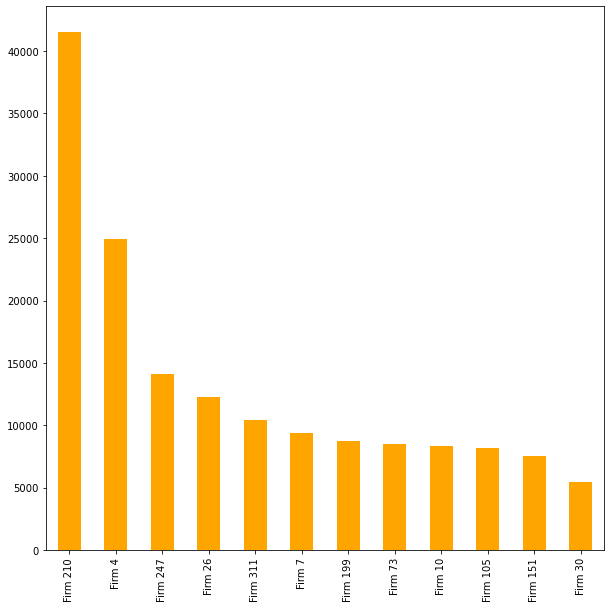

In [10]:
df['NWP'][df['NWP']['2020YE'] != 0].transpose().ewm(span=5, min_periods=5).mean().tail(1).transpose()['2020YE'].sort_values(ascending=False).head(12).plot.bar(color='orange', figsize=(10,10))

In [11]:
#Maximum deviation in the top 12 firms by using difference Deviation method

<AxesSubplot:>

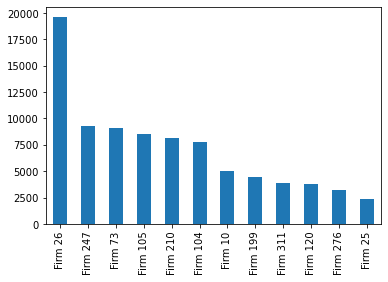

In [12]:
df['GWP'][(df['GWP'] != 0).all(1)].transpose().diff().dropna().std().sort_values(ascending=False).head(12).plot.bar()

<AxesSubplot:>

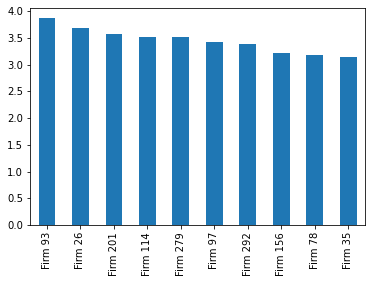

In [13]:
df['GWP'][(df['GWP'] != 0).all(1)].transpose().diff().dropna().abs().apply(lambda x: np.max(x) / np.mean(x)).sort_values(ascending=False).head(10).plot.bar()

In [14]:
#Cleaning of Dataframe for coverage ratio

In [15]:
SCR_DF=df['SCR coverage ratio'][(df['SCR coverage ratio']!=0).all(1)].transpose()
SCR_DF

,Firm 2,Firm 3,Firm 4,Firm 5,Firm 6,Firm 7,Firm 9,Firm 10,Firm 12,Firm 13,...,Firm 311,Firm 312,Firm 313,Firm 315,Firm 316,Firm 317,Firm 320,Firm 322,Firm 323,Firm 324
nan,,,,,,,,,,,,,,,,,,,,,
2016YE,3.15743,1.74141,1.38737,2.70762,1.23419,1.47584,2.2849,1.70014,2.74996,3.26214,...,1.46111,3.55816,1.88609,1.23725,1.26171,1.29772,4.18157e+06,1.18638,1.27685,1.56512
2017YE,3.87177,1.48045,1.38606,3.68104,1.22581,1.50778,1.9815,1.9148,2.88978,3.55566,...,1.46644,14.432,1.68379,1.60543,1.31376,1.10033,1.36608,1.35117,3.90571,1.49856
2018YE,5.13712,1.50558,1.42447,4.22697,1.3512,1.37066,2.11704,1.63476,3.11008,3.76768,...,1.41082,22.3995,1.46037,2.0257,1.52012,1.23171,1.35798,1.48642,11.5842,1.64926
2019YE,6.81334,1.46223,1.50316,2.39885,1.36917,1.61033,2.09563,1.66729,3.06611,3.96427,...,1.38472,22.4874,1.96989,1.7189,1.80669,1.26374,1.35355,1.42582,38.2088,1.77108
2020YE,3.90092,1.29873,1.41451,1.8995,1.39856,1.46169,2.36665,1.4213,3.04785,4.59164,...,1.31463,21.8555,2.51398,1.47862,1.79781,1.3532,1.34023,1.38176,2.66021,1.70776


In [16]:
#Ploting of worst performing firms over the years.

Text(0.5, 0, 'Yearly')

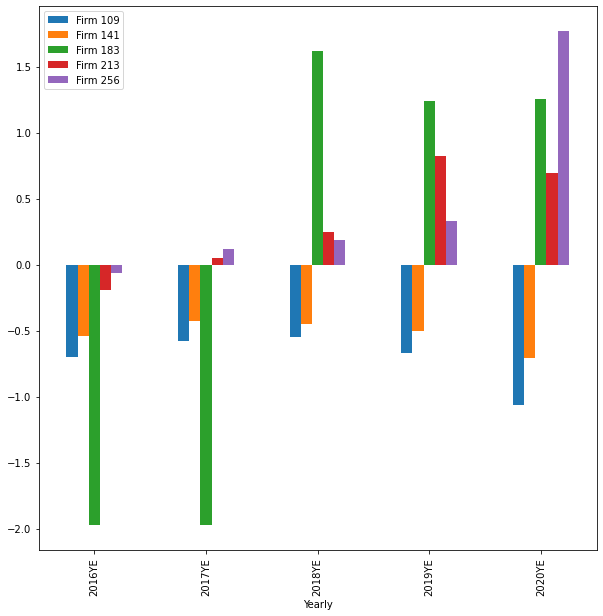

In [17]:
SCR_DF_NEG=SCR_DF[SCR_DF.columns[(SCR_DF <0).any()]]
SCR_DF_NEG
SCR_DF_NEG.plot(kind='bar',figsize=(10,10)).set_xlabel('Yearly') 


In [18]:
#Firms with Maximum SCR ratio on yearly basis
SCR_DF_PSV=SCR_DF[SCR_DF.columns[(SCR_DF >0).any()]].transpose()
SCR_DF_PSV


nan,2016YE,2017YE,2018YE,2019YE,2020YE
Firm 2,3.15743,3.87177,5.13712,6.81334,3.90092
Firm 3,1.74141,1.48045,1.50558,1.46223,1.29873
Firm 4,1.38737,1.38606,1.42447,1.50316,1.41451
Firm 5,2.70762,3.68104,4.22697,2.39885,1.8995
Firm 6,1.23419,1.22581,1.3512,1.36917,1.39856
...,...,...,...,...,...
Firm 317,1.29772,1.10033,1.23171,1.26374,1.3532
Firm 320,4.18157e+06,1.36608,1.35798,1.35355,1.34023
Firm 322,1.18638,1.35117,1.48642,1.42582,1.38176
Firm 323,1.27685,3.90571,11.5842,38.2088,2.66021


Text(0.5, 0, 'Yearly')

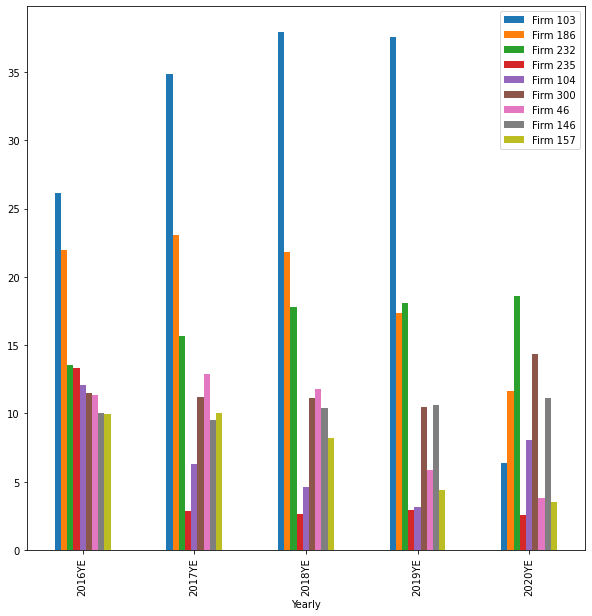

In [19]:
#removed outlier by removing number 1 firm with random number.

SCR_DF_PSV=SCR_DF_PSV.sort_values(['2016YE','2017YE', '2018YE','2019YE', '2020YE'], ascending=False).iloc[1:10]
SCR_DF_PSV.transpose().plot(kind='bar',figsize=(10,10)).set_xlabel('Yearly') 


In [20]:
#combined ratio cleaning and adding limit to check the profits. 

CMB_DF =df['Net combined ratio'][(df['Net combined ratio'] >= -2) & (df['Net combined ratio'] <= 2)].transpose()

In [21]:
CMB_DF.head(50)

,Firm 1,Firm 2,Firm 3,Firm 4,Firm 5,Firm 6,Firm 7,Firm 8,Firm 9,Firm 10,...,Firm 316,Firm 317,Firm 318,Firm 319,Firm 320,Firm 321,Firm 322,Firm 323,Firm 324,Firm 325
nan,,,,,,,,,,,,,,,,,,,,,
2016YE,0,0.955292,0,1.08021,0.755996,1.08457,0,1.08887,0.953236,1.10171,...,1.57369,1.05291,0.278385,0.702459,0,0.978004,1.56697,0,1.06314,0
2017YE,NaN,1.15694,0,1.70729,1.56934,0.935182,0,0.685197,1.00863,1.23979,...,1.36212,1.10154,-0.105852,1.59719,0,1.00269,1.59476,0,1.00694,0
2018YE,0,0.94362,0,NaN,1.52214,0.926506,0,-1.11303,1.03757,0.975677,...,NaN,0.995619,NaN,0.557531,0,0.97254,1.54736,0,0.982816,0
2019YE,0,0,0,NaN,1.30904,0.904502,0,0.887625,1.09675,0.996915,...,1.63337,0.936784,NaN,0.210722,0,0.958443,1.41856,0,0.994712,0
2020YE,0,0,0,NaN,1.0621,0.835525,0,0,0,0.945358,...,1.75205,1.05151,1.56904,1.41098,0,0.81687,1.16852,0,0.780065,0


In [22]:
CMB_DF[CMB_DF.columns[(CMB_DF !=0).any()]]
CMB_DF

,Firm 1,Firm 2,Firm 3,Firm 4,Firm 5,Firm 6,Firm 7,Firm 8,Firm 9,Firm 10,...,Firm 316,Firm 317,Firm 318,Firm 319,Firm 320,Firm 321,Firm 322,Firm 323,Firm 324,Firm 325
nan,,,,,,,,,,,,,,,,,,,,,
2016YE,0,0.955292,0,1.08021,0.755996,1.08457,0,1.08887,0.953236,1.10171,...,1.57369,1.05291,0.278385,0.702459,0,0.978004,1.56697,0,1.06314,0
2017YE,NaN,1.15694,0,1.70729,1.56934,0.935182,0,0.685197,1.00863,1.23979,...,1.36212,1.10154,-0.105852,1.59719,0,1.00269,1.59476,0,1.00694,0
2018YE,0,0.94362,0,NaN,1.52214,0.926506,0,-1.11303,1.03757,0.975677,...,NaN,0.995619,NaN,0.557531,0,0.97254,1.54736,0,0.982816,0
2019YE,0,0,0,NaN,1.30904,0.904502,0,0.887625,1.09675,0.996915,...,1.63337,0.936784,NaN,0.210722,0,0.958443,1.41856,0,0.994712,0
2020YE,0,0,0,NaN,1.0621,0.835525,0,0,0,0.945358,...,1.75205,1.05151,1.56904,1.41098,0,0.81687,1.16852,0,0.780065,0


Text(0.5, 0, 'Yearly')

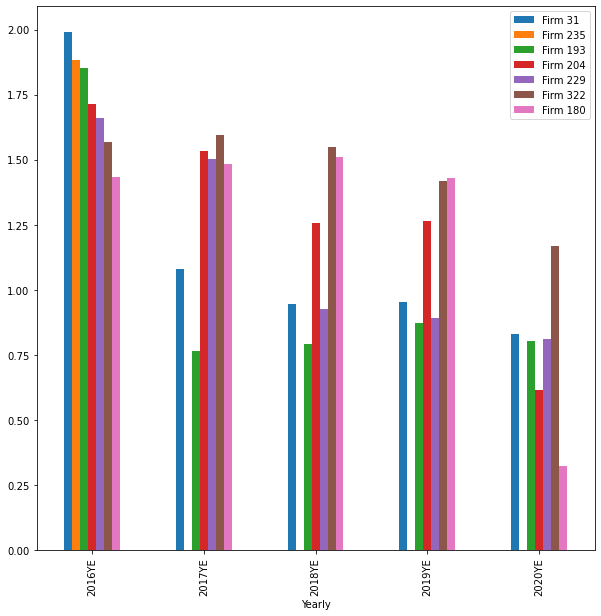

In [23]:
#checking for highest loss making firms and cleaning of Nan values columns.
CMB_DF=CMB_DF.loc[:, (CMB_DF != 0).any(axis=0)].transpose().dropna()

CMB_DF=CMB_DF.sort_values(['2016YE','2017YE', '2018YE','2019YE', '2020YE'], ascending=False)
CMB_DF.head(7).transpose().plot(kind='bar', figsize=(10,10)).set_xlabel('Yearly') 


In [24]:
#firms which has higheset claims incurred ratio and their performance over years.
GCI_DF=df['Gross claims incurred'].sort_values(['2016YE','2017YE', '2018YE','2019YE', '2020YE'], ascending=False)

Text(0.5, 0, 'Year over Year')

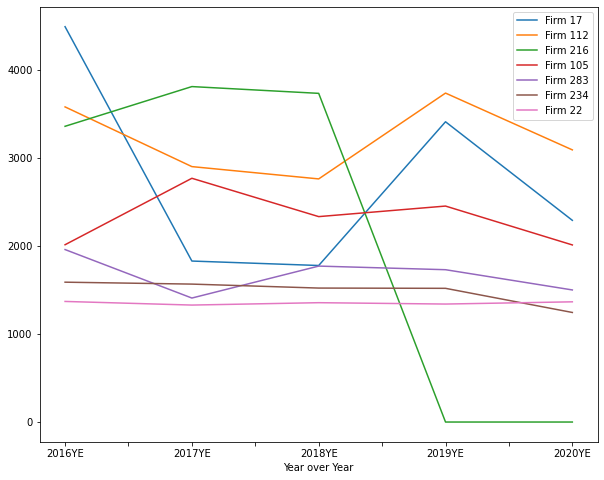

In [25]:
GCI_DF.head(7).transpose().plot(kind='line',figsize=(10,8)).set_xlabel( "Year over Year")